In [98]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

* 당신이 한 게임 쇼에서 3개의 문 중에 하나를 고를 수 있는 상황이라고 가정하자. 한 문 뒤에는 자동차가, 다른 두 문 뒤에는 염소가 있다.

* 당신이 1번 문을 고르자, 문 뒤에 무엇이 있는지 아는 사회자는 3번 문을 열어서 염소를 보여줬다. 그리고는 "2번 문으로 바꾸시겠습니까?"라고 물었다. 이 상황에서, 당신의 선택을 바꾸는 게 유리할까?

In [99]:
trial = 10000
win_avg_rate = []
for num in range(100):
    num_win = 0
    for _ in range(trial):
            
        doors = [0,0,1] # 1이 당첨, 0이 꽝
        random.shuffle(doors) # 당첨인 위치 바꾸기 

        choose_door = random.randint(0,2) # 0 하고 2 사이에서 랜덤하게 선택
        
        # 사용자가 선택하지 않고, 문 뒤에 당첨이 없는 경우를 열도록 한다
        revealed_door = random.choice([i for i in range(3) if i != choose_door and doors[i] == 0])

        # 선택을 바꾸자, 내가 기존에 선택하지 않았고, 밝혀지지 않은 곳으로 
        switch_door = [i for i in range(3) if i != choose_door and i != revealed_door][0]
        if doors[switch_door] == 1 :
            num_win += 1 
            
    win_avg_rate.append(num_win / trial)

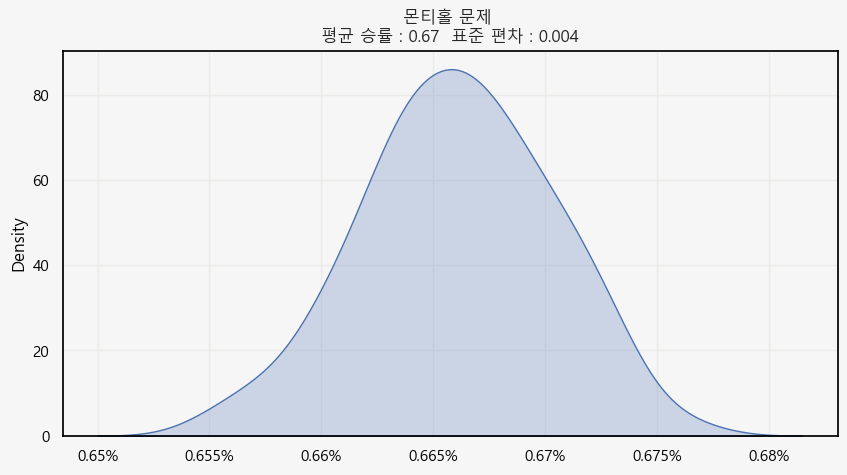

In [101]:
fig,ax = plt.subplots(figsize = (10,5))

mean = round(np.mean(win_avg_rate),2)
sd = round(np.std(win_avg_rate),3)

sns.kdeplot(data = win_avg_rate,
            fill = True,
            ax = ax)

ax.set_title(f'몬티홀 문제 \n 평균 승률 : {mean}  표준 편차 : {sd} ')
ax.set_xticklabels([str(tick) + '%' for tick in ax.get_xticks()]);

* 바꾸는 것의 승률이 2/3 , 바꾸지 않는 것의 승률이 1/3 이다.

* 사실 직관적으로는 바꾸든 안바꾸든 남은 두 개의 문 중 하나를 고르기 때문이 어차피 승률은 1/2 일 것 같지만

* 사회자가 문을 열어주는 행위를 통해 문 뒤에 차가 있을 확률에 대해서 알 수 있다.

예를 들어 A,B,C 중 하나의 문에 차가 있고, 사회자는 무조건 내가 선택한 후 남은 문을 열어줘야만 한다. 

이 때 나는 문 A 를 선택했고 사회자는 B 문을 열어주었다. 

1. 맨 처음 각 문에 차가 있을 사전 확률은 1/3으로 같다 .
2. 사회자가 B 문을 열어줄 확률은 내가 선택한 문과 차가 있는 위치에 따라 확률적으로 다르게 된다.
    * 2.1 이하부터는 내가 A 를 선택했음을 디폴트로 하겠다.
    * 2.1 A문 뒤에 차가 있을 경우 사회자는 B와 C 중 B 를 선택할 확률은 1/2 이다.
    * 2.2 C문 뒤에 차가 있을 경우 사회자는 B문을 열 수 밖에 없음으로 B 를 선택할 확률은 1이다. (A 는 내가 선택했기에 열어줄 수 없다)
3. A 문 뒤에 차가 있을 확률과 C 문 뒤에 차가 있을 확률을 계산하고 정규화 하여 확률을 계산한다.
    * 3.1 A 문 뒤에 차가 있으면서 사회자가 B 문을 열 확률은 1/3 * 1/2 = 1/6 이다.
    * 3.2 C 문 뒤에 차가 있으면서 사회자가 B 문을 열 확률은 1/3 * 1 = 1 이다
    
    * 두 확률을 정규화해주면 A 문뒤에 차가 있으면서 사회자가 B 문을 열어줄 확률은 1/3 , C 문뒤에 있을 확률은 2/3 으로 선택을 바꾸는 것이 더욱 승률이 높다.


4. 이는 진행자가 문을 열어준 사건을 통해, 각 문 뒤에 차가 있을 확률을 계산 할 수 있음을 나타낸다. 즉, 나의 사전 확률을(각 문 뒤에 차가 있을 확률) 사회자가 꽝인 문을 열어주는 사건을 통해 업데이틑 하여, 업데이트 된 사후확률에 입각한 결정을 하는 것을 보여주는 예제이다. 